In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
import math

import cptac
import cptac.utils as u
import plot_utils as p

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load all cptac cancers
brain = cptac.Gbm()
ccrcc = cptac.Ccrcc()
en = cptac.Endometrial()
hnscc = cptac.Hnscc()
colon = cptac.Colon()
brca = cptac.Brca()
luad = cptac.Luad()
Ovar = cptac.Ovarian()
Lscc = cptac.Lscc()

cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


cptac warning: The HNSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 5)


cptac warning: The LUAD dataset is under publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 8)


cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 10)


In [3]:
def myTrunc(theNumber, theDigits):

    myDigits = 10 ** theDigits
    return (int(theNumber * myDigits) / myDigits)

In [4]:
def plot_lin_regression(df1,x_axis, y_axis, hue, title = "Title", stat_x_axis = 1 , stat_y_axis = 1, ra_stats = False, show_plot = True, save_file_name = "file_name"):
    #format dfs 
    df1_subset = df1[[x_axis,y_axis,hue]]
    #df1_subset.columns = df1_subset.columns.droplevel(1)
    #def create_lin_reg_graph(df1, df2, x_axis, y_axis, title):
    df1_subset = df1_subset.dropna(axis=0, how="any")

    x1 = df1_subset[[x_axis]].values
    y1 = df1_subset[[y_axis]].values
    x1 = x1[:,0]
    y1 = y1[:,0]

    #slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
    corr, pval = scipy.stats.pearsonr(x1,y1)
        
    sns.set(style="darkgrid")
    plt.rcParams["figure.figsize"] = (30,22)
    graph = sns.lmplot(x= x_axis, y= y_axis, data=df1_subset, hue= hue, fit_reg=False)
    sns.regplot(x=x1, y=y1, data=df1_subset,scatter = False)
    graph.set(title = title)
   
    
    if ra_stats:
     
       
        pval = myTrunc(pval,7)
        corr = myTrunc(corr,3)
        #"Slope of regression: %s\nR-squared: %s\nPvalue: %s" %
        plt.text(stat_x_axis, stat_y_axis, "Correlation: %s\nPvalue: %s"%(corr,pval))
        
    if save_file_name != "file_name":
        
        #plt.tight_layout()
        plt.subplots_adjust(top=0.88)
        plt.savefig(save_file_name+'.png')
    if show_plot:
        plt.show()
        plt.clf()
        plt.close()
        
    
    

In [5]:
prot_hnscc = hnscc.get_proteomics()
prot_gbm = brain.get_proteomics()
prot_en = en.get_proteomics()
prot_colon = colon.get_proteomics()
prot_brca = brca.get_proteomics()
prot_luad = luad.get_proteomics()
prot_ovar = Ovar.get_proteomics()
prot_ccrcc = ccrcc.get_proteomics()


In [14]:
prot_ccrcc


#prot_brca.columns = prot_brca.columns.droplevel(1)

#prot_ccrcc.columns = prot_ccrcc.columns.droplevel(1)

filter_col = [col for col in prot_hnscc if col.startswith("MHC")]
filter_col

[]

False

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


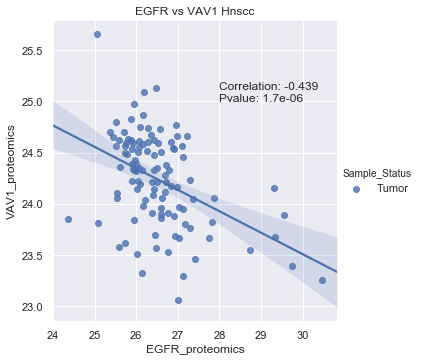

In [193]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CD274","EGFR","HLA-DRB1","GZMA","FOXP3","AKT1","KRAS","JAK2","VAV1"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

#(df1.median(skipna = True))
plot_lin_regression(df1,"EGFR_proteomics","VAV1_proteomics", "Sample_Status", stat_y_axis = 25, stat_x_axis = 28, title = "EGFR vs VAV1 Hnscc", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 93 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


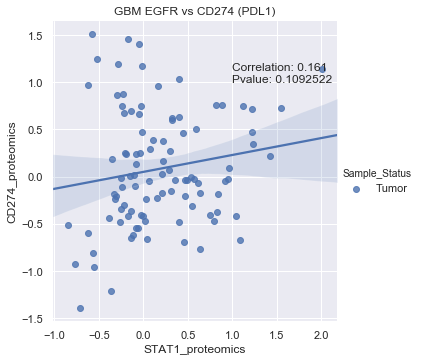

In [185]:
df1 = brain.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["EGFR","CD274","JAK2","STAT1"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

plot_lin_regression(df1,"STAT1_proteomics","CD274_proteomics", "Sample_Status",title = "GBM EGFR vs CD274 (PDL1)", ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


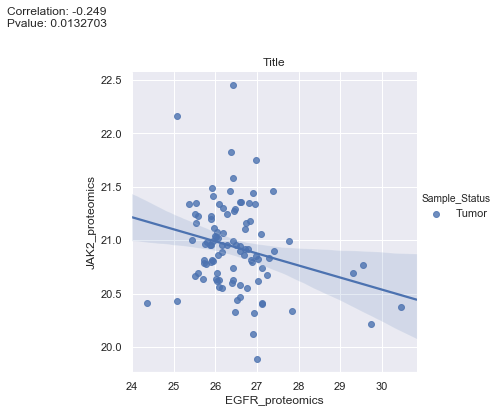

In [154]:
df1 = hnscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["EGFR","JAK2"])
#df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
 
df1
plot_lin_regression(df1,"EGFR_proteomics","JAK2_proteomics", "Sample_Status", stat_x_axis = 21, stat_y_axis = 23, ra_stats = True, show_plot = True)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 208 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


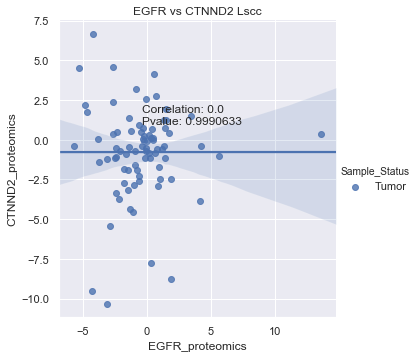

In [61]:
df1 = Lscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CTNND2","EGFR"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
plot_lin_regression(df1,"EGFR_proteomics","CTNND2_proteomics", "Sample_Status",title = "EGFR vs CTNND2 Lscc", ra_stats = True, show_plot = True)

In [184]:
df1 = luad.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["CD274","EGFR","JAK2","STAT1"])
df1.columns = df1.columns.droplevel(1)
df1 = df1.loc[df1['Sample_Status'] == "Tumor"]

#plot_lin_regression(df1,"CD274_proteomics","STAT1_proteomics", "Sample_Status",title = "EGFR vs CTSB", ra_stats = True, show_plot = True)

SyntaxError: invalid syntax (<ipython-input-184-b7975e7cff40>, line 5)

In [196]:
pd.set_option('display.max_columns', None)

In [198]:
hnscc.get_derived_molecular()

Name,CDKN2A_mutation,CSMD3_mutation,DNAH5_mutation,EGFR_pathway,ESTIMATE_immune_score,ESTIMATE_stromal_score,FAT1_mutation,Hypoxia_pathway,JAK.STAT_pathway,KMT2D_mutation,MAPK_pathway,NAT_pathology_review,NFkB_pathway,NOTCH1_mutation,PI3K_pathway,TGFb_pathway,TNFa_pathway,TP53_mutation,Trail_pathway,VEGF_pathway,chr_instability_idx,fibroblast_proportion,immune_proportion,muscle_proportion,mutation_count,normal_epithelial_proportion,p53_pathway,stemness_score,transcriptomic_subtype,tumor_pathology_review,tumor_proportion
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C3L-00977,0,1,1,0.911153,7989.115925,6825.995755,0,-0.471627,0.156291,0,0.728016,Soft Tissue No EPI%,-0.280471,0,1.053002,0.163961,0.090671,1,0.383120,1.030778,2.786782,0.000000e+00,0.333010,1.187015e-01,106,4.788805e-02,0.172796,0.953243,Mesenchymal,SCC 80%,0.500400
C3L-00987,0,0,0,-0.841256,4772.409716,5999.793467,0,0.435322,-2.095613,1,-0.230589,Soft Tissue No EPI;Normal No EPI%,-2.231904,0,-0.909516,0.442261,-2.309985,1,-1.288882,-0.201382,5.352115,NaN,NaN,NaN,83,NaN,-0.958467,0.825330,Classical,SCC 90%;SCC 90%;SCC 80%;SCC 70%,NaN
C3L-00994,0,0,1,-0.177897,8176.233903,8924.036564,0,-0.384437,0.550595,0,-0.058656,Normal EPI 10%;Normal EPI 10%%,0.553997,0,-0.186746,2.122224,0.329655,1,1.398885,0.446703,2.291782,7.726763e-03,0.266937,3.712125e-01,67,9.979053e-19,-1.554468,0.664581,Mesenchymal,SCC 40%;SCC 70%;SCC 40%;SCC 75%,0.354124
C3L-00995,0,0,1,0.072605,8342.246345,8723.429667,0,0.135254,-0.699944,0,-0.858004,Normal 15%;Normal 10%%,0.278294,0,0.413709,1.194100,1.081907,1,-0.525787,-0.129326,2.189810,5.026266e-02,0.347201,2.542939e-01,64,-6.674916e-19,0.143722,0.539918,Mesenchymal,SCC 90%;SCC 80%;SCC 40%;SCC 70%,0.348242
C3L-00997,0,0,0,0.815111,7445.251991,7025.911695,0,0.851369,0.193006,0,1.010800,Normal 10%%,0.219070,1,1.235615,0.040276,0.326655,1,0.642277,0.565578,3.949659,1.844718e-02,0.133582,1.055348e-01,129,2.576587e-01,-0.264763,0.843765,Classical,SCC 70%;SCC 70%,0.484778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-04277,0,0,0,-0.358336,8589.873314,7772.142353,1,-0.299913,0.364821,0,-0.267816,N 30%%,0.136716,0,-0.050981,0.746249,0.089470,1,0.643050,-0.799726,1.641052,3.478365e-02,0.292500,1.975360e-01,112,4.095374e-02,0.212039,0.575173,Mesenchymal,SCC 75%,0.434227
C3N-04278,1,1,0,-0.160308,7074.622965,6713.956510,1,-0.186784,-0.993789,0,-0.176368,N 25%%,-0.698748,0,-0.704322,-0.194625,-1.284371,1,0.622237,-0.866063,4.575309,1.055306e-18,0.173015,8.075840e-02,289,2.939234e-01,-1.075612,0.831637,Classical,PD 70%,0.452303
C3N-04279,0,0,0,1.305191,5469.762929,4913.198110,0,1.152412,0.218958,0,0.989251,N 20%%,0.688972,0,3.074425,0.201057,0.886492,1,-0.820320,1.997558,5.312774,-2.637730e-19,0.000000,-5.713636e-19,183,7.159701e-02,0.019352,0.862529,Classical,PDCa 70%,0.928403
